In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [27]:
df = pd.read_csv('/content/modified_diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,unknown,78.0,0,1,never,101.665015,6.6,140,0
1,Female,NaN,0,0,No Info,28.034572,6.6,80,0
2,Male,28.0,0,0,NaN,25.369152,5.7,9999,0
3,Female,37.0,0,0,yes,25.262602,NaN,155,0
4,Male,75.0,1,1,current,23.212811,4.8,155,0


**Preprocessing**
- Handle Missing Values

In [28]:
print('Count of Missing Values')
df.isnull().sum()

Count of Missing Values


,0
gender,0
age,2
hypertension,0
heart_disease,0
smoking_history,1
bmi,0
HbA1c_level,1
blood_glucose_level,0
diabetes,0


In [29]:
df = df.dropna()
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


- Outliers

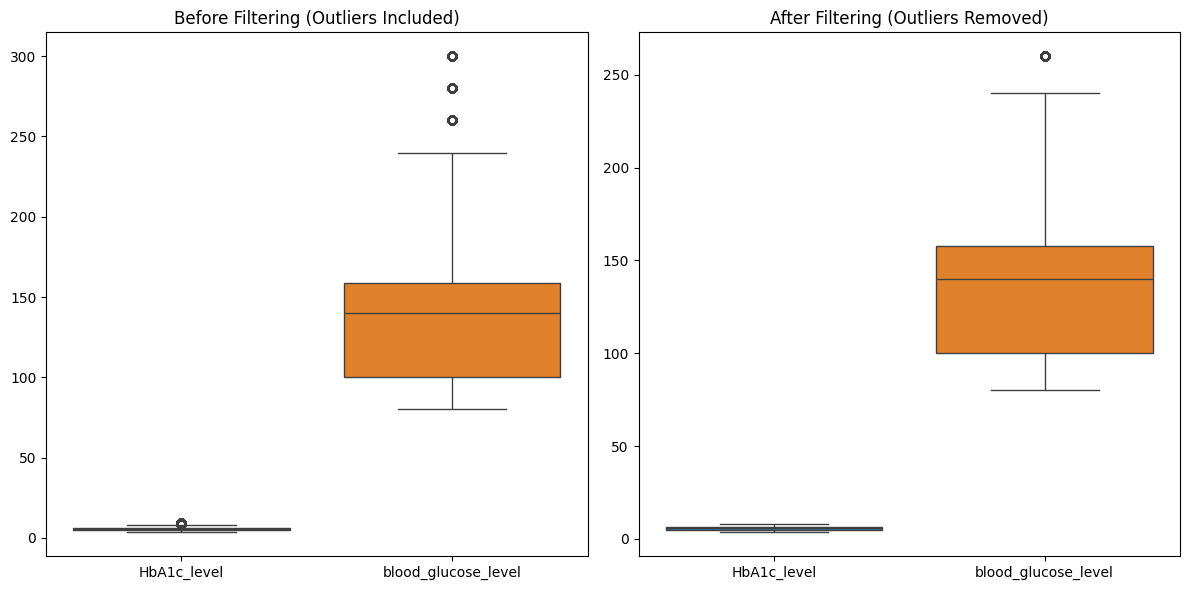

Filtered Data:
        gender   age  hypertension  heart_disease smoking_history         bmi  \
0      unknown  78.0             0              1           never  101.665015   
4         Male  75.0             1              1         current   23.212811   
5       Female  16.0             0              0           never   28.156373   
6       Female  46.0             0              0           never   16.546449   
7       Female  82.0             0              0         No Info   25.621355   
...        ...   ...           ...            ...             ...         ...   
99995   Female  81.0             0              0         No Info   27.505580   
99996   Female  -1.0             0              0         No Info   18.624383   
99997     Male  70.0             0              0          former   27.804892   
99998   Female  23.0             0              0           never   35.913652   
99999   Female  54.0             0              0         current   21.607675   

       HbA1c

In [30]:

outliers = pd.DataFrame()
df_filtered = df

for column in ['HbA1c_level', 'blood_glucose_level']:
    lower_limit = df[column].mean() - 3 * df[column].std()
    upper_limit = df[column].mean() + 3 * df[column].std()

    column_outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    outliers = pd.concat([outliers, column_outliers])

df_filtered = df[
    (np.abs(df['HbA1c_level'] - df['HbA1c_level'].mean()) <= (3 * df['HbA1c_level'].std())) &
    (np.abs(df['blood_glucose_level'] - df['blood_glucose_level'].mean()) <= (3 * df['blood_glucose_level'].std()))
]


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df[['HbA1c_level', 'blood_glucose_level']])
plt.title('Before Filtering (Outliers Included)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered[['HbA1c_level', 'blood_glucose_level']])
plt.title('After Filtering (Outliers Removed)')

plt.tight_layout()
plt.show()

print("Filtered Data:")
print(df_filtered)

print("\nDaten, Outliers Data:")
print(outliers)

df = df_filtered

- Duplicate

In [ ]:
duplicates = df[df.duplicated()]
print("Duplicate Rows:\n", duplicates)

- Inconsistent Data

In [ ]:
print("Unique values in 'gender':")
print(df['gender'].unique())

print("Unique values in 'smoking_history':")
print(df['smoking_history'].unique())

In [ ]:
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2, 'unknown': 3}
df['gender'] = df['gender'].map(gender_mapping)

smoking_history_mapping = {'never': 0, 'not current': 1, 'former': 2, 'current': 3, 'ever': 4, 'No Info': 5}
df['smoking_history'] = df['smoking_history'].map(smoking_history_mapping)

print(df[['gender', 'smoking_history']].head())

- Logic Errors

In [ ]:
invalid_age = pd.concat([df[df['age'] < 0], df[df['age'] > 120]])

print("Invalid age data:")
print(invalid_age)

mean_age = df['age'][(df['age'] >= 0) & (df['age'] <= 120)].mean()

df['age'] = df['age'].apply(lambda x: mean_age if x < 0 or x > 120 else x)

df

Invalid age data:
       gender   age  hypertension  heart_disease smoking_history        bmi  \
226      Male -2.00             0              0         No Info  24.869598   
271      Male -3.00             0              0         No Info  15.946293   
296    Female -3.00             0              0         No Info  15.144665   
360      Male -3.00             0              0         No Info  15.180772   
458      Male -1.00             0              0         No Info  17.511669   
...       ...   ...           ...            ...             ...        ...   
99808  Female -2.00             0              0           never  28.327815   
99906    Male -1.00             0              0         No Info  12.530383   
99916  Female -1.52             0              0         No Info  26.196254   
99940    Male -2.00             0              0         No Info  18.882412   
99996  Female -1.00             0              0         No Info  18.624383   

       HbA1c_level  blood_glucose

<ipython-input-7-980d608d4201>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].apply(lambda x: mean_age if x < 0 or x > 120 else x)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,unknown,78.000000,0,1,never,101.665015,6.6,140,0
4,Male,75.000000,1,1,current,23.212811,4.8,155,0
5,Female,16.000000,0,0,never,28.156373,6.6,85,0
6,Female,46.000000,0,0,never,16.546449,6.5,200,1
7,Female,82.000000,0,0,No Info,25.621355,5.7,85,0
...,...,...,...,...,...,...,...,...,...
99995,Female,81.000000,0,0,No Info,27.505580,6.2,90,0
99996,Female,41.598755,0,0,No Info,18.624383,6.5,100,0
99997,Male,70.000000,0,0,former,27.804892,5.7,155,0
99998,Female,23.000000,0,0,never,35.913652,4.0,100,0


**Save Preprocessed Data**

In [ ]:
df.to_csv('Preprocessed_data.csv', index=False)